# Decision tree
I will implement a simple Decision Tree as a first approximation to the classification algorithms.

Code: [Datacamp](https://www.datacamp.com/community/tutorials/decision-tree-classification-python) 

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier      # The Decision Tree
from sklearn.model_selection import train_test_split # train_test_split to split the data
from sklearn import metrics                          # metrics module from scikit-learn for calculating precision

## The data
Uploading the data. The table contains $p_T$, $m$, $\eta$, $\phi$, $E$, $\tau_ {21}$, $m_ {jj}$ and $\Delta R_ {12}$ of the two most energetic clustered jets, as well as * no. of hadrons * of the event and a column * label * that indicates if it is signal (1) or background (0) 

In [2]:
# Uploading the data (this data is created on the 0.0-pre-processing-RD.ipynb notebook)
df_RD = pd.read_csv('../data/eventosRD_100000.csv')
df_RD.head()

E_j1         E_j2  deltaR_j12    eta_j1    eta_j2  label  \
0  1541.103551  1314.832020    3.046675 -0.676879 -0.479236    0.0   
1  1735.554053  1456.732975    3.175913  0.487036  0.215936    0.0   
2  1747.277774  2131.876916    3.196916 -0.561281 -0.915332    0.0   
3  1955.619525  2206.429386    3.483775  0.608165 -0.867853    0.0   
4  1810.986292  2424.718009    3.642805 -0.664116  1.154562    0.0   

         m_j1        m_j2        m_jj  n_hadrones        pT_j1        pT_j2  \
0  140.326113   53.455092  193.781205       212.0  1239.698604  1176.086061   
1  140.960881   91.964940  232.925821       160.0  1543.152632  1420.578669   
2  130.198271  595.900967  726.099237       245.0  1499.892043  1412.636020   
3  388.869494   37.471626  426.341119       116.0  1609.609763  1574.869196   
4  242.616470  201.110818  443.727289       146.0  1460.557601  1385.597608   

     phi_j1    phi_j2  tau_21_j1  tau_21_j2  
0 -0.949919  2.090338   0.672299   0.556964  
1  0.580209 -2.584112   0.429885   0.709729  
2 -2.168662  1.008589   0.682710   0.489799  
3 -0.565932  2.589707   0.740089   0.559426  
4 -1.685001  1.471332   0.437715   0.566019

## Classifier
First, we will separate the variables and the column that indicates whether the event is signal or background. 

In [3]:
# List of the variables
carac_cols = df_RD.columns.values.tolist()
# Removing 'label'
carac_cols.remove('label')
carac_cols

['E_j1',
 'E_j2',
 'deltaR_j12',
 'eta_j1',
 'eta_j2',
 'm_j1',
 'm_j2',
 'm_jj',
 'n_hadrones',
 'pT_j1',
 'pT_j2',
 'phi_j1',
 'phi_j2',
 'tau_21_j1',
 'tau_21_j2']

In [4]:
# Get a dataframe of the variables
X = df_RD[carac_cols]
X.head()

E_j1         E_j2  deltaR_j12    eta_j1    eta_j2        m_j1  \
0  1541.103551  1314.832020    3.046675 -0.676879 -0.479236  140.326113   
1  1735.554053  1456.732975    3.175913  0.487036  0.215936  140.960881   
2  1747.277774  2131.876916    3.196916 -0.561281 -0.915332  130.198271   
3  1955.619525  2206.429386    3.483775  0.608165 -0.867853  388.869494   
4  1810.986292  2424.718009    3.642805 -0.664116  1.154562  242.616470   

         m_j2        m_jj  n_hadrones        pT_j1        pT_j2    phi_j1  \
0   53.455092  193.781205       212.0  1239.698604  1176.086061 -0.949919   
1   91.964940  232.925821       160.0  1543.152632  1420.578669  0.580209   
2  595.900967  726.099237       245.0  1499.892043  1412.636020 -2.168662   
3   37.471626  426.341119       116.0  1609.609763  1574.869196 -0.565932   
4  201.110818  443.727289       146.0  1460.557601  1385.597608 -1.685001   

     phi_j2  tau_21_j1  tau_21_j2  
0  2.090338   0.672299   0.556964  
1 -2.584112   0.429885   0.709729  
2  1.008589   0.682710   0.489799  
3  2.589707   0.740089   0.559426  
4  1.471332   0.437715   0.566019

In [5]:
# Get the serie for the label (signal or background)
y = df_RD['label']
type(y)

pandas.core.series.Series

We separate the data set into training and test sets: 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

We create and train the model

In [7]:
# Creating the object for the Decision Tree classifier
cdt = DecisionTreeClassifier()

# Training it
cdt = cdt.fit(X_train,y_train)

# Getting predictions for the tests set
y_pred = cdt.predict(X_test)

In [8]:
# Presicion of the model
print("Precision:",metrics.accuracy_score(y_test, y_pred))

Precisión: 0.9475333333333333


## Plot of the model
To understand how you are classifying the model, we can graph it

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(cdt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = carac_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../data/decisiontree.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.317132 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.317132 to fit



## Optimization
For the previous decision tree the *Gini index* was used for selection. However, the gotten tree is hard to understand. We can try to optimize it using other selection criteria, for example *entropy*.

In [10]:
# Creating the object for the Decision Tree classifier
cdt = DecisionTreeClassifier(criterion="entropy", # Here we select entropy
                             max_depth=3)         # and fix the depth

# Training
cdt = cdt.fit(X_train,y_train)

# Predictions for the test set
y_pred = cdt.predict(X_test)

# Calculating precision
print("Precision:",metrics.accuracy_score(y_test, y_pred))

Precisión: 0.9440666666666667


We note that the precision does not decrease dramatically. Now we graph:

In [11]:
dot_data = StringIO()
export_graphviz(cdt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = carac_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../data/decisiontreeshort.png')
Image(graph.create_png())

We can obtain the **importance of each variable** in the classification: 

In [12]:
peso = cdt.feature_importances_.tolist()
features = X_train.columns.tolist()
f_i = list(zip(features, peso))

f_i

[('E_j1', 0.0),
 ('E_j2', 0.0),
 ('deltaR_j12', 0.0),
 ('eta_j1', 0.0),
 ('eta_j2', 0.0),
 ('m_j1', 0.0),
 ('m_j2', 0.0),
 ('m_jj', 0.5370143635693682),
 ('n_hadrones', 0.31292308318031964),
 ('pT_j1', 0.07867703252786812),
 ('pT_j2', 0.04320363874803786),
 ('phi_j1', 0.0),
 ('phi_j2', 0.0),
 ('tau_21_j1', 0.02818188197440621),
 ('tau_21_j2', 0.0)]

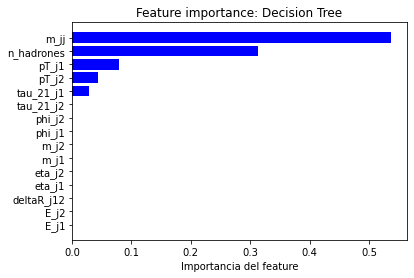

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sorting from smallest to largest 
f_i.sort(key=lambda x: x[1], reverse=False) 

# Getting the names and the scores separately
# and sorting the tuples from smallest to largest score 
features = list(zip(*f_i))[0]
score = list(zip(*f_i))[1]
x_pos = np.arange(len(features)) 

# Plotting
plt.barh(x_pos, score, align='center', color = 'blue')
plt.yticks(x_pos, features) 
plt.xlabel('Importancia del feature')
plt.title('Feature importance: {}'.format('Decision Tree'))
plt.show()

With this Decision Tree the classification criteria is easier to understand. 

## Black Box 1
We can test the classifier on BB1. We load the data: 

In [15]:
# This data was generated on the 0.0-pre-processing-BB1.ipynb notebook
df_bb = pd.read_csv('../data/eventosBB1_100000.csv')
df_bb.head()

E_j1         E_j2  deltaR_j12    eta_j1    eta_j2  label  \
0  1563.704411  1802.812644    3.154878  0.215797  0.724064    0.0   
1  2672.474719  1776.179488    2.699110  0.659932  0.648318    0.0   
2  1419.017839  1758.557371    3.277478 -0.147723  0.725017    0.0   
3  1305.230912  3047.866378    3.474055  0.214087 -1.718316    0.0   
4  1537.733425  1370.397248    3.120373  0.271324  0.093318    0.0   

         m_j1        m_j2         m_jj  n_hadrones        pT_j1        pT_j2  \
0  162.112941  153.211835   315.324776        77.0  1519.754514  1410.194772   
1  999.760867  549.878495  1549.639362       288.0  2021.928491  1387.062287   
2  151.422868  640.423695   791.846563       214.0  1395.659808  1285.009488   
3   70.102505  252.674687   322.777192       117.0  1274.038565  1055.652281   
4   55.673065  118.221098   173.894163        72.0  1481.845642  1359.365265   

     phi_j1    phi_j2  tau_21_j1  tau_21_j2  
0 -0.320496  2.793171   0.889400   0.978155  
1 -1.640937  1.058148   0.356523   0.360868  
2  0.979668 -2.179476   0.585259   0.181974  
3  1.325886 -1.561132   0.690229   0.240786  
4  0.849572 -2.265720   0.570342   0.957220

Get the predictions of the model

In [16]:
pred_bb1 = cdt.predict(df_bb[carac_cols])

In [17]:
# We convert into dataframe for easy manipulatio
df_pred = pd.DataFrame(pred_bb1, columns=['pred'])
df_pred.head()

pred
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0

In [18]:
# We verify that they have the same number of events
df_pred.shape[0] == df_bb['label'].shape[0]

True

We concatenate the column with the predictions to the dataframe:

In [19]:
df_bb = pd.concat([df_bb, df_pred], axis=1, sort=False)
df_bb.head()

E_j1         E_j2  deltaR_j12    eta_j1    eta_j2  label  \
0  1563.704411  1802.812644    3.154878  0.215797  0.724064    0.0   
1  2672.474719  1776.179488    2.699110  0.659932  0.648318    0.0   
2  1419.017839  1758.557371    3.277478 -0.147723  0.725017    0.0   
3  1305.230912  3047.866378    3.474055  0.214087 -1.718316    0.0   
4  1537.733425  1370.397248    3.120373  0.271324  0.093318    0.0   

         m_j1        m_j2         m_jj  n_hadrones        pT_j1        pT_j2  \
0  162.112941  153.211835   315.324776        77.0  1519.754514  1410.194772   
1  999.760867  549.878495  1549.639362       288.0  2021.928491  1387.062287   
2  151.422868  640.423695   791.846563       214.0  1395.659808  1285.009488   
3   70.102505  252.674687   322.777192       117.0  1274.038565  1055.652281   
4   55.673065  118.221098   173.894163        72.0  1481.845642  1359.365265   

     phi_j1    phi_j2  tau_21_j1  tau_21_j2  pred  
0 -0.320496  2.793171   0.889400   0.978155   0.0  
1 -1.640937  1.058148   0.356523   0.360868   0.0  
2  0.979668 -2.179476   0.585259   0.181974   0.0  
3  1.325886 -1.561132   0.690229   0.240786   0.0  
4  0.849572 -2.265720   0.570342   0.957220   0.0

Calculating the precision of the model 

In [20]:
# Calculamos la precisión del modelo
print("Precisión:", metrics.accuracy_score(df_bb['label'], df_pred))

Precisión: 0.9687


We can get a general report with *metrics*

In [21]:
# "Build a text report showing the main classification metrics."
print(metrics.classification_report(df_bb['label'], df_pred, target_names=['fondo','senal']))

              precision    recall  f1-score   support

       fondo       1.00      0.97      0.98     99914
       senal       0.02      0.58      0.03        86

    accuracy                           0.97    100000
   macro avg       0.51      0.78      0.51    100000
weighted avg       1.00      0.97      0.98    100000



In [22]:
# Compute the balanced accuracy.

# The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. 
# It is defined as the average of recall obtained on each class.

print(metrics.balanced_accuracy_score(df_bb['label'], df_pred))

0.7752143587671444


In [23]:
# Compute the precision.

# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

print(metrics.precision_score(df_bb['label'], df_pred))

0.015903307888040712


In [24]:
# Log loss, aka logistic loss or cross-entropy loss.
print(metrics.log_loss(df_bb['label'], df_pred))

1.0810884407051955


In [25]:
print(metrics.recall_score(df_bb['label'], df_pred))

0.5813953488372093


## Confusion matrix

A confusion matrix is a tool that allows you to visualize the performance of a supervised learning algorithm. The diagonal elements represent the number of points for which the predicted label equals the true label, while the off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix, the better, indicating many correct predictions. 

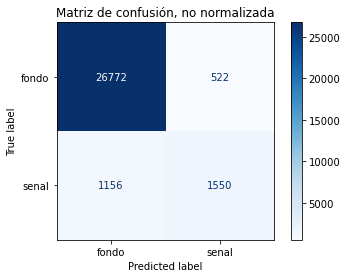

In [26]:
import matplotlib.pyplot as plt

# Confusion matrix plot
# Code: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

titles_options = [("Matriz de confusión, no normalizada", None),
                  ("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(cdt, X_test, y_test,
                                 display_labels=['fondo','senal'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    plt.show()